In [1]:
# Import Basics Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import bz2

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Read in training data from CSV
df_train = pd.read_csv('./amazon_review_full_sentiment_csv/train.csv')
df_train.columns =['Sentiment', 'Title', 'Text']
df_train

Sentiment                                  Title  \
0                5                              Inspiring   
1                5  The best soundtrack ever to anything.   
2                4                       Chrono Cross OST   
3                5                    Too good to be true   
4                5         There's a reason for the price   
...            ...                                    ...   
2999994          1                          Don't do it!!   
2999995          2          Looks nice, low functionality   
2999996          2             compact, but hard to clean   
2999997          3                         Hard to clean!   
2999998          1                     what is it saying?   

                                                      Text  
0        I hope a lot of people hear this cd. We need m...  
1        I'm reading a lot of reviews saying that this ...  
2        The music of Yasunori Misuda is without questi...  
3        Probably the greatest soundtrack in history! U...  
4        There's a reason this CD is so expensive, even...  
...                                                    ...  
2999994  The high chair looks great when it first comes...  
2999995  I have used this highchair for 2 kids now and ...  
2999996  We have a small house, and really wanted two o...  
2999997  I agree with everyone else who says this chair...  
2999998  not sure what this book is supposed to be. It ...  

[2999999 rows x 3 columns]

In [3]:
# Read in testing data from CSV
df_test = pd.read_csv('./amazon_review_full_sentiment_csv/test.csv')
df_test.columns =['Sentiment', 'Title', 'Text']
df_test

Sentiment                                           Title  \
0               4                         Surprisingly delightful   
1               2                    Works, but not as advertised   
2               2                                         Oh dear   
3               2                                 Incorrect disc!   
4               2                                  Incorrect Disc   
...           ...                                             ...   
649994          5                                    Pretty Cool!   
649995          5                                        great cd   
649996          2  An interesting look into Boston's comedy clubs   
649997          5                      Du vol...pour les cowboys!   
649998          4      A Companion Read To GUNS, GERMS, AND STEEL   

                                                     Text  
0       This is a fast read filled with unexpected hum...  
1       I bought one of these chargers..the instructio...  
2       I was excited to find a book ostensibly about ...  
3       I am a big JVC fan, but I do not like this mod...  
4       I love the style of this, but after a couple y...  
...                                                   ...  
649994  We got it for our mom's birthday. She LOVES it...  
649995  this cd is very good. i especially love "cats ...  
649996  This was a good documentary on the history of ...  
649997  Avez-vous déjà vu un CD double et un DVD avec ...  
649998  If you like books that offer explanations for ...  

[649999 rows x 3 columns]

In [4]:
# Downsample the training set to 300,000 samples
percentage = 0.0025
df_train_downsampled = df_train.sample(frac=percentage,random_state=0)
df_train_downsampled

Sentiment                                              Title  \
146865           1                                       Poor quality   
1685110          5                              Thoroughly enjoyable.   
1483116          2                                    LACKLUSTER LIVE   
897704           4  Should not have to search all over the interne...   
1181262          4                     model builder ,for collections   
...            ...                                                ...   
850945           5              Atlantis...Disney goes for the glory!   
1832240          3                              Personal Opinion Only   
653817           1                                     disappointment   
2600681          2  Lots of historic information, tedious presenta...   
2959066          5                                Great little device   

                                                      Text  
146865   I am watching this and love them, but the qual...  
1685110  We Have thoroughly enjoyed ALL of the Columbo ...  
1483116  Very disappointed in this cd. For a "live" per...  
897704   After a 20 minute web search, here are the ing...  
1181262  I am a model builder and collector,I mainly us...  
...                                                    ...  
850945   Im a 19 male just out of high school who went ...  
1832240  I was not really that impressed with this effo...  
653817   After much consideration, I chose this over th...  
2600681  It's a history book! If you love Hugh Johnson ...  
2959066  After getting my Tapwave Zodiac that has built...  

[7500 rows x 3 columns]

In [5]:
# Downsample the testing set to 65,000 samples
percentage = 0.0025
df_test_downsampled = df_test.sample(frac=percentage,random_state=0)
df_test_downsampled

Sentiment                                      Title  \
256247          4                 Suspicion of Deceit Review   
62325           4                    Classic fantasy fiction   
466251          2                                 Bedroom...   
151789          5                             great show ...   
539417          2                 Pretty boring but pleasant   
...           ...                                        ...   
434960          2                                Not so good   
570537          2  reserving final judgement on this grinder   
305785          5                           Awesome Scooter!   
131249          5                               A Novel Poem   
347691          5                    Lord, this is your word   

                                                     Text  
256247  Another wonderful story by Barbara Parker. Ext...  
62325   The Castle of Llyr is the third book in the Ch...  
466251  To be honest, this is the first book in my who...  
151789  I have not finished the whole season yet (only...  
539417  I don't know what all the fuss is all about. A...  
...                                                   ...  
434960  The trimmer not only cuts hair, but skin as we...  
570537  This coffee grinder was purchased to replace a...  
305785  Awesome Scooter. Bought it for my son's 4th bi...  
131249  How unique, new yet old, to use a series of po...  
347691  If you want to get more depth into of what thi...  

[1625 rows x 3 columns]

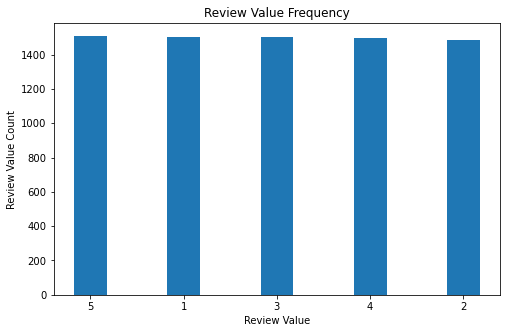

In [6]:
# Visual of Training Samples' Outcomes - Even Distribution of Outcomes
sent_count = df_train_downsampled['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
w = 0.35  
plt.bar(x=np.arange(len(sent_count)), height=sent_count, width = w)

plt.xticks(np.arange(len(sent_count)), sent_count.index.tolist())
plt.xlabel('Review Value')
plt.ylabel('Review Value Count')
plt.title('Review Value Frequency')

plt.show()

In [7]:
# Eliminate Title Feature - Train
TrainXdf = df_train_downsampled['Text']
TrainYdf = df_train_downsampled['Sentiment']
[TrainXdf, TrainYdf]

[146865     I am watching this and love them, but the qual...
 1685110    We Have thoroughly enjoyed ALL of the Columbo ...
 1483116    Very disappointed in this cd. For a "live" per...
 897704     After a 20 minute web search, here are the ing...
 1181262    I am a model builder and collector,I mainly us...
                                  ...                        
 850945     Im a 19 male just out of high school who went ...
 1832240    I was not really that impressed with this effo...
 653817     After much consideration, I chose this over th...
 2600681    It's a history book! If you love Hugh Johnson ...
 2959066    After getting my Tapwave Zodiac that has built...
 Name: Text, Length: 7500, dtype: object,
 146865     1
 1685110    5
 1483116    2
 897704     4
 1181262    4
           ..
 850945     5
 1832240    3
 653817     1
 2600681    2
 2959066    5
 Name: Sentiment, Length: 7500, dtype: int64]

In [8]:
# Eliminate Title Feature - Test
TestXdf = df_test_downsampled['Text']
TestYdf = df_test_downsampled['Sentiment']
[TestXdf, TestYdf]

[256247    Another wonderful story by Barbara Parker. Ext...
 62325     The Castle of Llyr is the third book in the Ch...
 466251    To be honest, this is the first book in my who...
 151789    I have not finished the whole season yet (only...
 539417    I don't know what all the fuss is all about. A...
                                 ...                        
 434960    The trimmer not only cuts hair, but skin as we...
 570537    This coffee grinder was purchased to replace a...
 305785    Awesome Scooter. Bought it for my son's 4th bi...
 131249    How unique, new yet old, to use a series of po...
 347691    If you want to get more depth into of what thi...
 Name: Text, Length: 1625, dtype: object,
 256247    4
 62325     4
 466251    2
 151789    5
 539417    2
          ..
 434960    2
 570537    2
 305785    5
 131249    5
 347691    5
 Name: Sentiment, Length: 1625, dtype: int64]

In [9]:
if ( not TrainXdf.isnull().values.any() and not TrainYdf.isnull().values.any() ):
    print("Training set has no NULL values.")
if ( not TestXdf.isnull().values.any() and not TestYdf.isnull().values.any() ):
    print("Testing set has no NULL values.")

Training set has no NULL values.
Testing set has no NULL values.


In [10]:
# "One-Hot Encoding" Function that converts the Reviews to Numerical Arrays
def oneHotEnc(SamplesArray):
    X_ = []
    for review in SamplesArray:
            token_item = []
            for letter in review.lower():
                # print(letter)
                if ord(letter) >= ord('a') and ord(letter) <= ord('z'):
                    token_item.append(ord(letter) - ord('a') + 11)
                elif ord(letter) >= ord('0') and ord(letter) <= ord('9'):
                    token_item.append(ord(letter) - ord('0') + 1)
                elif letter == ' ':
                    token_item.append(-1)
                else:
                    pass
                    #token_item.append(0)
            X_.append(token_item)
    return X_

# Get Finalized Training and Testing Sets
TrainXdf = oneHotEnc(TrainXdf)
TestXdf = oneHotEnc(TestXdf)

TrainYdf=np.array(TrainYdf)
TestYdf=np.array(TestYdf)

TrainXdf

[[19,
  -1,
  11,
  23,
  -1,
  33,
  11,
  30,
  13,
  18,
  19,
  24,
  17,
  -1,
  30,
  18,
  19,
  29,
  -1,
  11,
  24,
  14,
  -1,
  22,
  25,
  32,
  15,
  -1,
  30,
  18,
  15,
  23,
  -1,
  12,
  31,
  30,
  -1,
  30,
  18,
  15,
  -1,
  27,
  31,
  11,
  22,
  19,
  30,
  35,
  -1,
  19,
  29,
  -1,
  32,
  15,
  28,
  35,
  -1,
  26,
  25,
  25,
  28,
  -1,
  33,
  19,
  29,
  18,
  15,
  14,
  -1,
  19,
  -1,
  18,
  11,
  14,
  -1,
  24,
  25,
  30,
  -1,
  29,
  26,
  15,
  24,
  30,
  -1,
  23,
  35,
  -1,
  23,
  25,
  24,
  15,
  35,
  -1,
  25,
  24,
  -1,
  19,
  30],
 [33,
  15,
  -1,
  18,
  11,
  32,
  15,
  -1,
  30,
  18,
  25,
  28,
  25,
  31,
  17,
  18,
  22,
  35,
  -1,
  15,
  24,
  20,
  25,
  35,
  15,
  14,
  -1,
  11,
  22,
  22,
  -1,
  25,
  16,
  -1,
  30,
  18,
  15,
  -1,
  13,
  25,
  22,
  31,
  23,
  12,
  25,
  -1,
  29,
  15,
  28,
  19,
  15,
  29,
  -1,
  11,
  24,
  14,
  -1,
  22,
  25,
  25,
  21,
  -1,
  16,
  25,
  28,
  33,
  11,
  2

In [11]:
# Item Memory Generation Function
def itemMemGen(dim=10000, num_char=37):
    dictMem = np.random.randint(2, size=(num_char, dim), dtype='int32')
    dictMem[dictMem == 0] = -1
    return dictMem

# Hyperparamaters
HV_dim = 10000
num_supported_chars = 37

# Item Memory Generation
itemMem = itemMemGen(dim=HV_dim, num_char=num_supported_chars)

In [12]:
# Function for Encoding a Review into a HV
def encode(review, itemMem, HV_dim=10000, n_gram_len=3):
    review_HV = np.zeros(HV_dim, dtype='int32')

    for ngram_start in range(0, len(review)-n_gram_len, 3):
        roll_value=n_gram_len
        for j in range(n_gram_len):
            letterHV = itemMem[review[ngram_start + j]]

            if (j==0):
                product = letterHV
            elif (j==n_gram_len-1):
                product = product * np.roll(letterHV, roll_value)
                review_HV = np.add(review_HV, product)
            else:
                product = product * np.roll(letterHV, roll_value)
                
            roll_value = roll_value - 1

    HV_avg = np.average(review_HV)
    review_HV[review_HV > HV_avg] = 1
    review_HV[review_HV < HV_avg] = -1
    review_HV[review_HV == HV_avg] = 0
    return review_HV

# HDC Training Function Creates Associative Memory
def train(X, Y, itemMem, HV_dim, sent_count, n_gram_len):
    assocMem = np.zeros((sent_count, HV_dim), dtype='int32')
    review_idx = 0
    
    for review in X:
        review_HV = encode(review, itemMem, HV_dim, n_gram_len)
        assocMem[Y[review_idx]-1] = np.add(assocMem[Y[review_idx]-1], review_HV)
        review_idx += 1

    return assocMem

n_gram_len = 3
assocMem = train(TrainXdf, TrainYdf, itemMem, HV_dim, len(sent_count), n_gram_len)
assocMem

array([[-244, -140,  -61, ...,  642, -254, -512],
       [-310, -194,  104, ...,  576, -218, -526],
       [-343, -289,   37, ...,  635, -233, -551],
       [-196, -172,  -22, ...,  610, -386, -486],
       [-129, -133,   11, ...,  619, -299, -495]])

In [13]:
# Function Compares Input HV to Class HVs and Returns the Predicted Class
def get_prediction(assocMem, inputHV):
    pred = assocMem[0]
    maximum = np.NINF

    for index in range(len(assocMem)):
        similarity = cosine_similarity([inputHV, assocMem[index]])[0][1]  
        if (similarity > maximum):
            pred = index+1
            maximum = similarity

    return pred

# Function Tests the Model and Return Accuracy of Model
def test(HV_dim, n_gram_len, itemMem, assocMem, TestXdf, TestYdf):
    correct_count = 0

    for index in range(len(TestXdf)):
        prediction = get_prediction(assocMem, encode(TestXdf[index], itemMem, HV_dim, n_gram_len))
        if (TestYdf[index] == prediction):
            correct_count += 1
            
    accuracy = (correct_count / len(TestYdf)) * 100
    return accuracy

# One-Shot Training Results
one_shot_accuracy=test(HV_dim, n_gram_len, itemMem, assocMem, TestXdf, TestYdf)
print("One Shot Accuracy: ", one_shot_accuracy)

One Shot Accuracy:  33.292307692307695


In [14]:
def retrain(X, Y, itemMem, assocMem, HV_dim, n_gram_len, alpha):
    review_index = 0

    for review in X:
        review_HV = encode(review, itemMem, HV_dim, n_gram_len)
        prediction = get_prediction(assocMem, review_HV)
        if prediction != Y[review_index]:
            assocMem[Y[review_index]-1] = np.add(assocMem[Y[review_index]-1], alpha * review_HV)
            assocMem[Y[review_index]-1] = np.subtract(assocMem[Y[review_index]-1], alpha * review_HV)
        review_index += 1

    return assocMem

# Re-Train Model
num_epochs = 20
print('-------- Retraining Model: ', num_epochs, ' Epochs --------')
for epoch in range(num_epochs):
    assocMem = retrain(TrainXdf, TrainYdf, itemMem, assocMem, HV_dim, n_gram_len, alpha = num_epochs - epoch)
    acc = test(HV_dim, n_gram_len, itemMem, assocMem, TestXdf, TestYdf)
    print('Epoch ', (epoch+1), ': ', acc)

-------- Retraining Model:  20  Epochs --------
Epoch  1 :  33.292307692307695
Epoch  2 :  33.292307692307695
Epoch  3 :  33.292307692307695
Epoch  4 :  33.292307692307695
Epoch  5 :  33.292307692307695
Epoch  6 :  33.292307692307695
Epoch  7 :  33.292307692307695
Epoch  8 :  33.292307692307695
Epoch  9 :  33.292307692307695
Epoch  10 :  33.292307692307695
Epoch  11 :  33.292307692307695
Epoch  12 :  33.292307692307695
Epoch  13 :  33.292307692307695
Epoch  14 :  33.292307692307695
Epoch  15 :  33.292307692307695
Epoch  16 :  33.292307692307695
Epoch  17 :  33.292307692307695
Epoch  18 :  33.292307692307695
Epoch  19 :  33.292307692307695
Epoch  20 :  33.292307692307695
